In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import h5py
import io
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image
#import yt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from hdf5_func import *

# Datastructure

- XX is %02d integer from 0 to 44.
<img src="ID.png">

- Each group has the dimension [ Physical quantities, Samples, Time, Width, Height, Depth].

- $\mathrm{Physical quantities} \in \{\mathrm{Vx, Vy, Vz, density, pressure, temperature, t-coordinate, x-coordinate, y-coordinate, z-coordinate}\}$

# Pick up ID and type_i from the table

In [ ]:
ID=15 # 0~44
type_i=0 # [0,1,2] = ["dense", "moderate", "sparse"]

# Show 2D slice of physical quantities from 3D voxel.

## Density

In [2]:

Type=["dense", "moderate", "sparse", "GADGET"]
Temp=["10K", "100K", "1000K"]
temp_i=int((ID)*20/300)
Metal=["1Z", "0.1Z", "0Z"]
metal_i=int((ID)*20/100)%3
out_file = '/Turb-{}-{}-{}.{:02d}.h5'.format(Type[type_i], Metal[metal_i],Temp[temp_i],ID)

out_file

'/Turb-dense-1Z-100K.15.h5'

<KeysViewHDF5 ['GADGET', 'Vx', 'Vy', 'Vz', 'dense', 'density', 'moderate', 'pressure', 'sparse', 't-coordinate', 'temperature', 'x-coordinate', 'y-coordinate', 'z-coordinate']>
(20, 50, 64, 64, 64)
[0.         0.07085603 0.14171207 0.2125681  0.28342414 0.35428017
 0.42513621 0.49599224 0.56684828 0.63770431] Myr


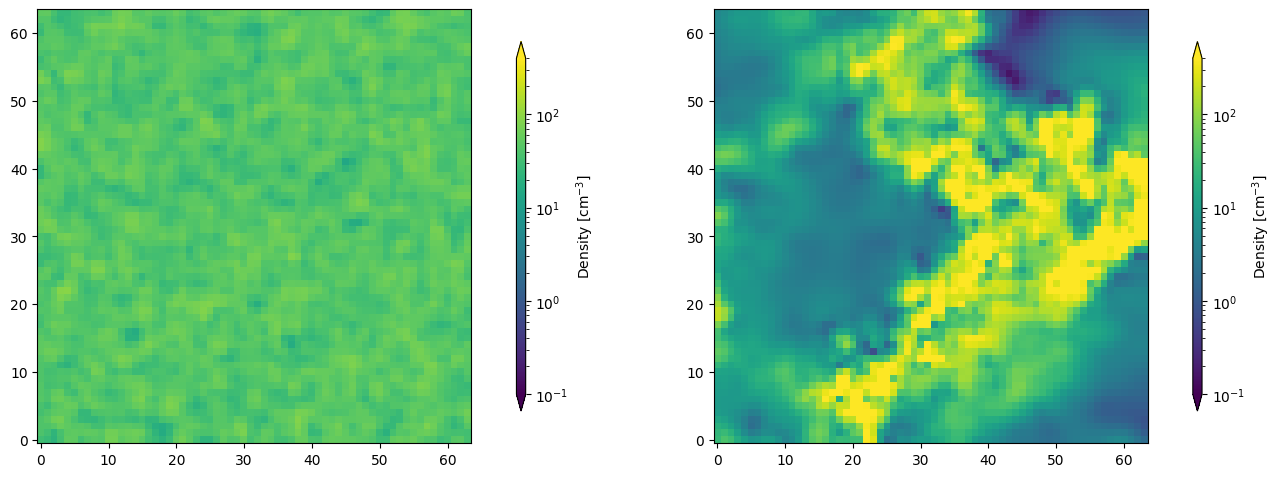

In [3]:
path_to_data='/mnt/home/polymathic/ceph/the_well/3D/turbulence_gravity_cooling/data/'#.format(type)
h5_path = path_to_data+out_file

# Make an instance
units_instance = UnitsLoader(Type[type_i])

# Load units from a HDF5 file
loaded_units_instance = UnitsLoader.load_from_hdf5(h5_path, Type[type_i])


with h5py.File(h5_path, 'r') as infh:
    print(infh.keys())
    print(infh['density'].shape)
    print(loaded_units_instance.time.value*infh['t-coordinate'][0:10]/loaded_units_instance.yr.value*1e-6, "Myr")

    fig = plt.figure(figsize=(16, 8.0))

    ax = plt.subplot(1, 2, 1)


    plt.imshow(loaded_units_instance.Hdensity.value*infh['density'][10,0,:,:,32].T,norm=LogNorm(vmin=1e-1,vmax=4e2), origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Density [$\rm cm^{-3}$]')

    ax=plt.subplot(1, 2, 2)
    plt.imshow(loaded_units_instance.Hdensity.value*infh['density'][10,35,:,:,32].T,norm=LogNorm(vmin=1e-1,vmax=4e2), origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Density [$\rm cm^{-3}$]')
    plt.show()


## Pressure

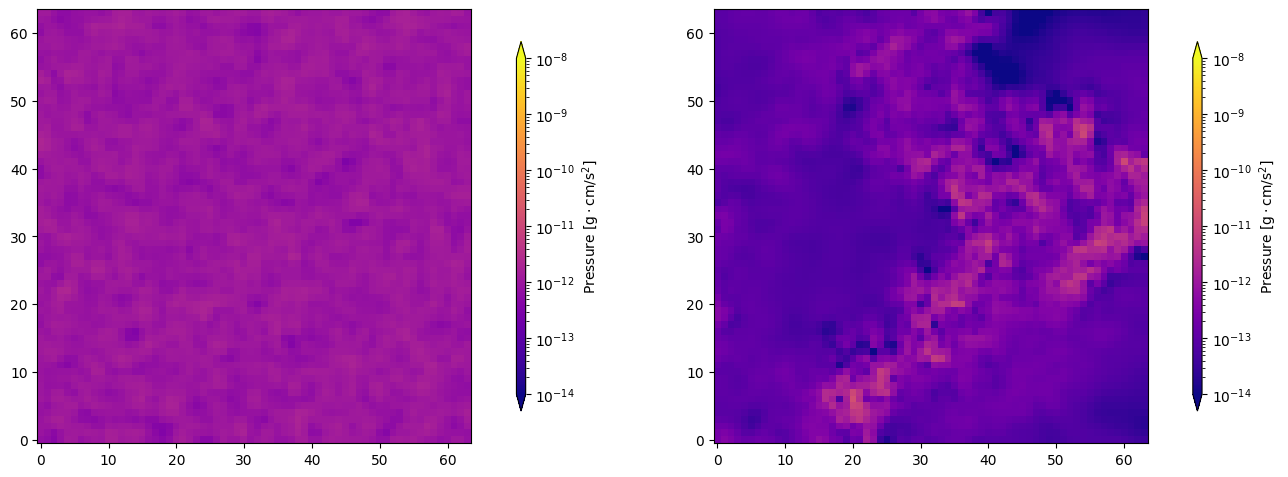

In [4]:

with h5py.File(h5_path, 'r') as infh:
    log_norm = LogNorm(vmin=1e-14,vmax=1e-8)

    fig = plt.figure(figsize=(16, 8.0))

    ax = plt.subplot(1, 2, 1)


    plt.imshow(loaded_units_instance.pressure.value*infh['pressure'][10,0,:,:,32].T, norm=log_norm, cmap=mpl.colormaps['plasma'], origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Pressure [$\rm g \cdot cm / s^{2}$]')

    ax=plt.subplot(1, 2, 2)
    plt.imshow(loaded_units_instance.pressure.value*infh['pressure'][10,35,:,:,32].T, norm=log_norm, cmap=mpl.colormaps['plasma'], origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Pressure [$\rm g \cdot cm / s^{2}$]')
    plt.show()



## Velocity

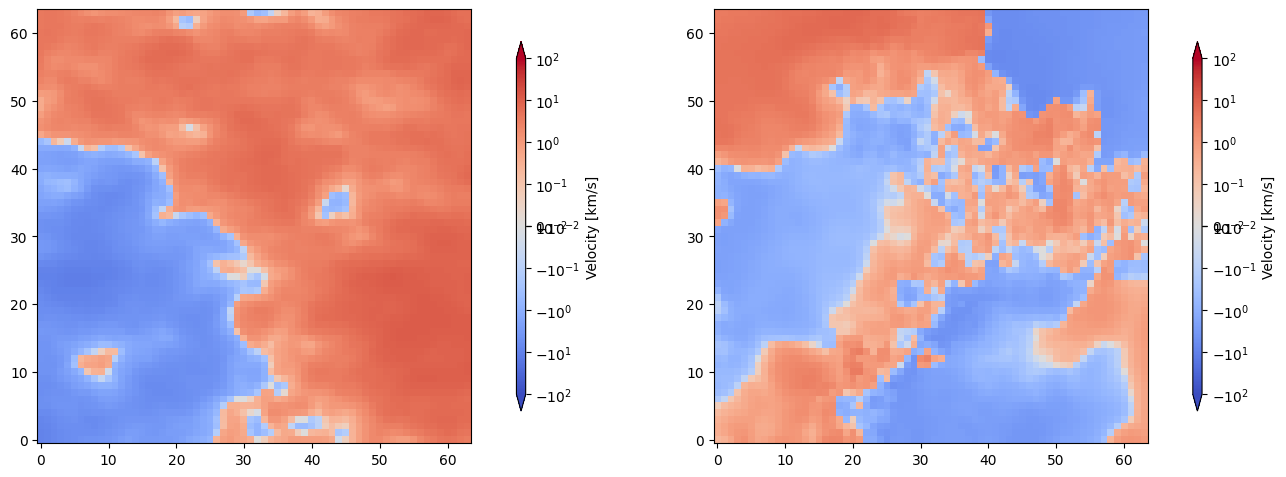

In [5]:
with h5py.File(h5_path, 'r') as infh:
    abs_max=1e2
    log_norm = SymLogNorm(linthresh=1e-2, linscale=1e-3, vmin=-abs_max, vmax=abs_max)


    fig = plt.figure(figsize=(16, 8.0))

    ax = plt.subplot(1, 2, 1)


    plt.imshow(loaded_units_instance.velocity.value*infh['Vx'][10,0,:,:,32].T, norm=log_norm, cmap='coolwarm', origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Velocity [km/s]')

    ax=plt.subplot(1, 2, 2)
    plt.imshow(loaded_units_instance.velocity.value*infh['Vx'][10,35,:,:,32].T, norm=log_norm, cmap='coolwarm', origin='lower')
    plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
                  extend='both', label=r'Velocity [km/s]')
    plt.show()

